## <font color = "purple"> Exploratory Data Analysis </font>

In [42]:
# Import libaries 
import pandas as pd
import os

In [43]:
# Read the data
os.listdir("data")
df = pd.ExcelFile("data/AGO STOCK MOVEMENT 2015.xlsx")
print(df.sheet_names)

# January data
jan = pd.read_excel(df, "JANUARY 2015", skiprows=5)
jan = jan[["DATE", "SALES"]]
jan = jan.iloc[0:32,:]
jan.tail()

['JANUARY 2015', 'FEBRUARY 2015', 'MARCH 2015', 'APRIL 2015', 'MAY 2015', 'JUNE 2015', 'JULY 2015', 'AUGUST 2015', 'SEPTEMBER 2015']


,DATE,SALES
27,2015-01-27,6870.83
28,2015-01-28,6042.06
29,2015-01-29,5947.24
30,2015-01-30,6324.38
31,2015-01-31,4880.65


In [44]:
# February data
feb = pd.read_excel(df, "FEBRUARY 2015", skiprows=5)
feb = feb[["DATE","SALES"]]
feb = feb.iloc[0:29,:]
feb.head()
# Concatinating the two
final= pd.concat([jan, feb])
final.shape

(61, 2)

In [45]:
# Using a for loop to concatenate the sheets
# Define the sheet names

file_path = "data/AGO STOCK MOVEMENT 2015.xlsx"
sheet_names = ['JANUARY 2015', 'FEBRUARY 2015', 'MARCH 2015', 'APRIL 2015', 'MAY 2015', 'JUNE 2015', 'JULY 2015', 'AUGUST 2015', 'SEPTEMBER 2015']# list to store the final dataframe

cleaned_data = []
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name, skiprows = 5)
    df = df[["DATE", "SALES"]].iloc[0:32,:]
    cleaned_data.append(df)
# concatenate dataframes
dt = pd.concat(cleaned_data)
display(dt)

,DATE,SALES
0,NaT,NaN
1,2015-01-01 00:00:00,3171.43
2,2015-01-02 00:00:00,3843.45
3,2015-01-03 00:00:00,3556.74
4,2015-01-04 00:00:00,3482.36
...,...,...
27,2015-08-27 00:00:00,NaN
28,2015-08-28 00:00:00,NaN
29,2015-08-29 00:00:00,NaN
30,2015-08-30 00:00:00,NaN


In [46]:
# The column names
dt.columns
dt[dt.isnull()]

,DATE,SALES
0,NaT,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
27,NaN,NaN
28,NaN,NaN
29,NaN,NaN
30,NaN,NaN


In [47]:
# Number of rows and columns
dt.shape

(288, 2)

In [48]:
# Summary statistics
dt["SALES"].describe()

count      252.00
unique     250.00
top       3843.45
freq         2.00
Name: SALES, dtype: float64

In [49]:
# Column types
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    277 non-null    object
 1   SALES   252 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [50]:
# Convert the date column to DateTime
dt["DATE"] = pd.to_datetime(dt["DATE"])
dt["DATE"].info()

<class 'pandas.core.series.Series'>
Int64Index: 288 entries, 0 to 31
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
277 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.5 KB


In [63]:
# Checking for nulls
dt.isnull().sum()
# Impute the nulls
dt_upd = dt.dropna()

In [64]:
# Dropping the duplicates
dt_upd = dt_upd.drop_duplicates(subset = "DATE")

In [73]:
# Conerting the values of "Sales" column to floats
dt_upd["SALES"] = [float(i) for i in dt_upd["SALES"]]

## <font color = #b0793e>Visualization</font>

In [74]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='SALES'>

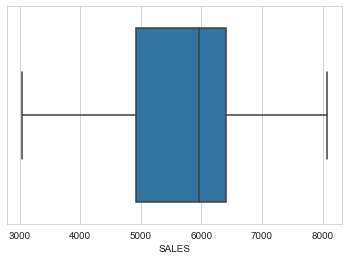

In [75]:
# Sales Boxplot
sns.set_style("whitegrid")
sns.boxplot(x ="SALES", data = dt_upd)

* Most of the daily sales range from 5000 to 6500

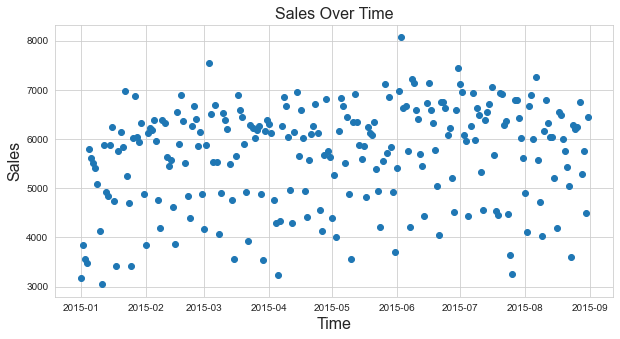

In [76]:
# Sales by month
plt.figure(figsize=(10,5))
plt.scatter(dt_upd["DATE"],dt_upd["SALES"])
plt.xlabel("Time", size = 16)
plt.ylabel("Sales", size = 16)
plt.title("Sales Over Time", size=16)
plt.show()

In [77]:
# Line graph using PlotlyExpress
import plotly_express as px
px.line(dt_upd,x = "DATE",y = "SALES")

In [79]:
# List comprehension statement that creates a column with the name of the months
dt_upd["MONTH"] = [i.month_name() for i in dt_upd["DATE"]]
dt_upd.head()

,DATE,SALES,MONTH
1,2015-01-01,3171.43,January
2,2015-01-02,3843.45,January
3,2015-01-03,3556.74,January
4,2015-01-04,3482.36,January
5,2015-01-05,5790.26,January


In [89]:
# Retrieving a specific time period from a dataframe
x = dt_upd["DATE"].iloc[6]
print(x)

2015-01-07 00:00:00


In [90]:
print(x.day)
print(x.weekday())
print(x.day_of_week)
print(x.day_of_year)
print(x.month)
print(x.month_name())
print(x.year)
print(x.day_name())

7
2
2
7
1
January
2015
Wednesday


In [91]:
# Grouby to create a montly barplot
dy = dt_upd.\
    groupby("MONTH")["SALES"].\
        agg(["mean","count","median"]).\
            reset_index()

dy.head()

,MONTH,mean,count,median
0,April,5608.587667,30,5890.885
1,August,5720.184516,31,6002.690
2,February,5652.459643,28,5923.170
3,January,5121.782258,31,5422.140
4,July,5925.148710,31,6287.380


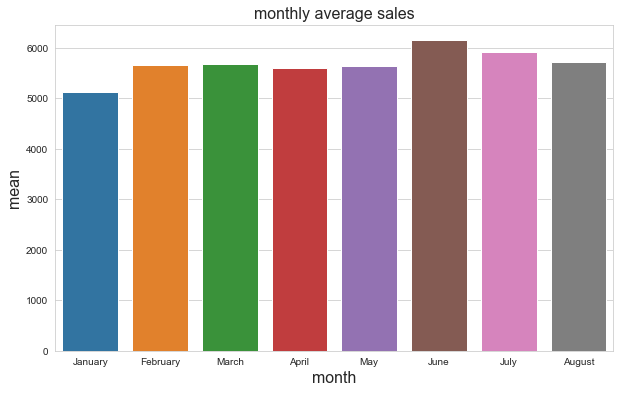

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August"]
dy["MONTH"] = pd.Categorical(dy["MONTH"], categories = month_order, ordered = True)
plt.figure(figsize = (10,6))
sns.barplot(data = dy,x = "MONTH",y = "mean")
plt.title("monthly average sales", size=16)
plt.xlabel("month", size = 16)
plt.ylabel("mean", size = 16)
plt.show()